In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Loading the dataset


In [2]:
mnist = tf.keras.datasets.fashion_mnist
(training_images,training_labels),(test_images,test_labels)= mnist.load_data()

In [3]:
# Normalizing the data
training_images = training_images / 255.0
test_images = test_images / 255.0

# Building the base model

In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation=tf.nn.relu),
    tf.keras.layers.Dense(10,activation=tf.nn.softmax)
])


In [5]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(training_images,training_labels,epochs=5)

Instructions for updating:
Colocations handled automatically by placer.
Epoch 1/5
60000/60000 [==============================] - 5s 83us/sample - loss: 0.4735 - acc: 0.8311
Epoch 2/5
60000/60000 [==============================] - 4s 68us/sample - loss: 0.3589 - acc: 0.8694
Epoch 3/5
60000/60000 [==============================] - 4s 68us/sample - loss: 0.3231 - acc: 0.8822
Epoch 4/5
60000/60000 [==============================] - 4s 69us/sample - loss: 0.2980 - acc: 0.8898
Epoch 5/5
60000/60000 [==============================] - 4s 69us/sample - loss: 0.2817 - acc: 0.8955


In [6]:
test_loss = model.evaluate(x=test_images,y=test_labels)

10000/10000 [==============================] - 0s 24us/sample - loss: 0.3437 - acc: 0.8807


# Adding convolutions in the model

In [7]:
training_images = training_images.reshape(60000,28,28,1)
test_images = test_images.reshape(10000,28,28,1)

In [8]:
training_images = training_images/255.0
test_images = test_images/255.0

In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation=tf.nn.relu, input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation=tf.nn.relu),
    tf.keras.layers.Dense(10,activation=tf.nn.softmax)
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total para

In [10]:
model.fit(training_images,training_labels,epochs=5)

Epoch 1/5
60000/60000 [==============================] - 32s 542us/sample - loss: 0.9524 - acc: 0.6556
Epoch 2/5
60000/60000 [==============================] - 34s 569us/sample - loss: 0.6497 - acc: 0.7553
Epoch 3/5
60000/60000 [==============================] - 33s 550us/sample - loss: 0.5888 - acc: 0.7790
Epoch 4/5
60000/60000 [==============================] - 32s 541us/sample - loss: 0.5392 - acc: 0.7983
Epoch 5/5
60000/60000 [==============================] - 32s 532us/sample - loss: 0.5036 - acc: 0.8138


# Visualizing the layers

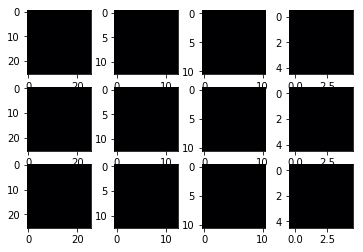

In [20]:
import matplotlib.pyplot as plt
f,axarr = plt.subplots(3,4)
FIRST_IMAGE=1
SECOND_IMAGE=7
THIRD_IMAGE=26
CONVOLUTION_NUMBER = 2
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
    f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[0,x].grid(False)
    f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[1,x].grid(False)
    f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[2,x].grid(False)